# --- Day 14: Regolith Reservoir ---

In [24]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
## Import
file = "day-14-input.txt"

# file = "day-14-input.txt"

## Need a list of lists with each list containing the int(coordinates)
with open(file, "r") as f:
    # Iterate through lines in f and strip and split on the new line
    data = [i.split(" -> ") for i in f.read().strip().split('\n')]
    for j in range(len(data)):
        # Map the objects in each list as integers making a list of lists of list pairs
        data[j] = [list(map(int, row.split(","))) for row in data[j]]

In [25]:
## Need to create a list of co-ordinates that have been filled with rocks.

filledSpaces = []

## For each row from out inputs we have a list of coordinates each repped as a list

for row in data:
    ## Task does not require diagonal lines, this is helpful
    ## Iterate throw each row and pull out the starting position and the end position
    for idx in range(1, len(row)):
        currentX, currentY = row[idx - 1] ## each row[idx] is a pair
        futureX, futureY = row[idx] ## This is where we want to end up!

        ## Since we know its either horizontal or vertical we can compare
        ## the current and future coordinates to determine direction
        
        if currentX == futureX: ## Vertical
            ## Issue here is we cant assume that it is always increasing...
            for filledY in range(min(futureY, currentY),max(futureY, currentY) + 1):
                filledSpaces.append((currentX,filledY))


        elif currentY== futureY: ## Horizonal
            ## Issue here is we cant assume that it is always increasing...
            for filledX in range(min(futureX, currentX),max(futureX, currentX) + 1):
                filledSpaces.append((filledX,currentY))


## We know sand comes from 500,0 but we need to know how deep it goes...

## First remove any duplicates
filledSpaces = set(filledSpaces)

## Pull out x and ys
allY = [i[1] for i in filledSpaces]
allX = [i[0] for i in filledSpaces]

## depth is max of all ys
depth = max(allY)

## Need these for later on!
sandCoords = []

startingPosition = [500,0]

163

In [26]:
## Function to simulate the sand falling
## For task 2
## Instead of returning true or false
## Break the loop when it cant move anymore and take that sand location and return it from the function
def sand():
    global filledSpaces
    global depth
    global sandCoords
    global startingPosition
    
    ## Starting position
    sandX, sandY = 500,0

    ## If sand gets past depth (last line/row) then in the abyss
    while sandY <= depth:
        ## Look one below
        if(sandX, sandY + 1) not in filledSpaces:
            ## Adjust sandY value
            sandY += 1
            continue
        ## Down one to the left
        if(sandX - 1, sandY + 1) not in filledSpaces:
            sandX -= 1
            sandY += 1
            continue
        
        ## down one to the right
        if(sandX + 1, sandY + 1) not in filledSpaces:
            sandX += 1
            sandY += 1
            continue



        ## When sand cant move anymore
        break
    
    sandCoords.append([sandX,sandY])
    
    return [sandX,sandY]





In [27]:
## Run the simulation
task2 = 0

while True:
    ## Get resting location of sand peice
    newSand = sand()

    ## Add the tuple of new sand to filledSpaces
    filledSpaces.add(tuple(newSand))

    task2 += 1
    
    ## Break loop if the returned value of newSand is equal to the starting position
    if newSand == startingPosition:
        break

task2

25500

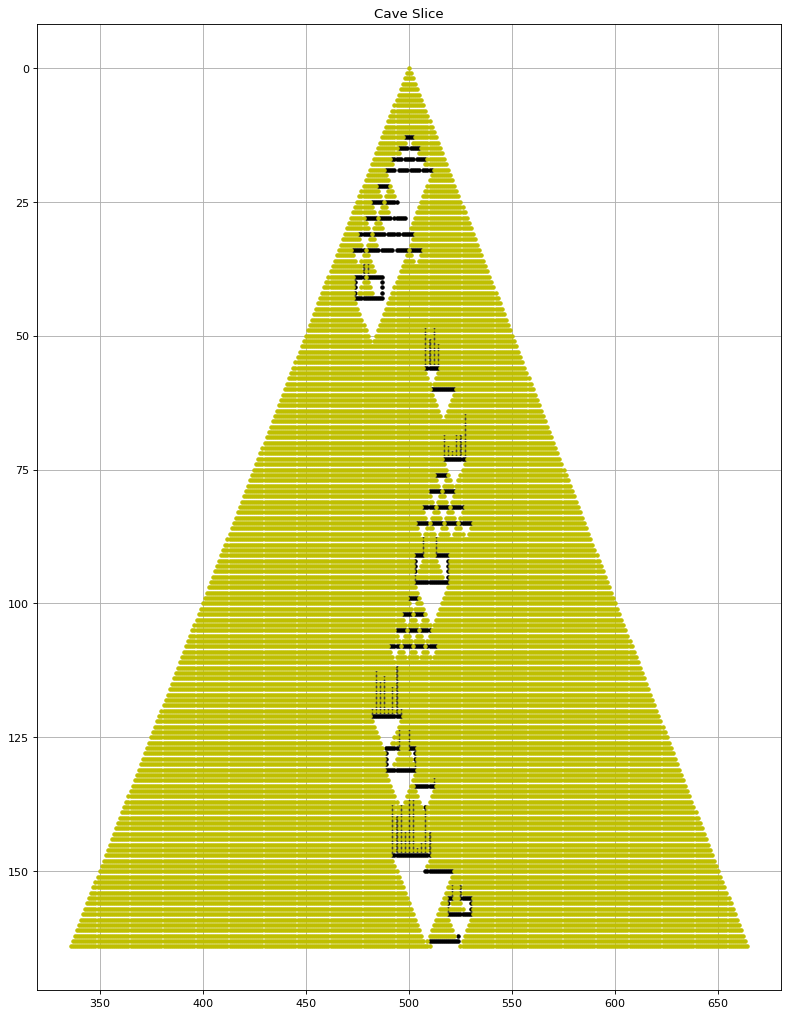

In [30]:
## Get sand coordinates
sandX, sandY = [i[0] for i in sandCoords],[i[1] for i in sandCoords]

## plot it!
figure(figsize=(12, 16), dpi=80)
plt.plot(allX,allY,'k.')
plt.plot(sandX,sandY,'y.')
# Displaying grid
plt.grid()
plt.gca().invert_yaxis()
# Adding title
plt.title('Cave Slice')
# Displaying plot
plt.show()